<a href="https://colab.research.google.com/github/kanishgask/MACHINE-LEARNING-/blob/main/DATAPREPROCESSING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Load the Titanic dataset
# Using seaborn built-in dataset
# df = sns.load_dataset('titanic')

# Alternatively, if you downloaded CSV from Kaggle:
df = pd.read_csv(r'/train.csv')
df = pd.read_csv(r'/gender_submission.csv')
df = pd.read_csv(r'/test.csv')  # Make sure train.csv is in your Colab session or provide the full path

# Display first 5 rows
df.head()


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
# Check missing values
print("Missing values per column:\n", df.isnull().sum())

# Drop columns with >50% missing
threshold = 0.5
df = df[df.columns[df.isnull().mean() < threshold]]

# Fill missing numerical values with median
num_cols = df.select_dtypes(include=['int64','float64']).columns
for col in num_cols:
    df[col].fillna(df[col].median(), inplace=True)

# Fill missing categorical values with mode
cat_cols = df.select_dtypes(include=['object','category']).columns
for col in cat_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

# Verify missing values handled
df.isnull().sum()


Missing values per column:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


/tmp/ipython-input-2421050787.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
/tmp/ipython-input-2421050787.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
# Check for duplicates
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows found: {duplicates}")

# Remove duplicate rows
df.drop_duplicates(inplace=True)
print("Duplicate rows removed. Current dataset shape:", df.shape)


Number of duplicate rows found: 0
Duplicate rows removed. Current dataset shape: (891, 11)


In [ ]:
# One-hot encoding for categorical columns (use Kaggle column names)
categorical_cols = ['Sex', 'Embarked', 'Pclass', 'Deck']  # Adjust based on your dataset
for col in categorical_cols:
    if col in df.columns:
        df = pd.get_dummies(df, columns=[col], drop_first=True)

# Convert boolean columns (if any exist) to numeric
bool_cols = df.select_dtypes(include=['bool']).columns
df[bool_cols] = df[bool_cols].astype(int)

df.head()



,PassengerId,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_male,Embarked_Q,Embarked_S,Pclass_2,Pclass_3
0,892,"Kelly, Mr. James",34.5,0,0,330911,7.8292,NaN,1,1,0,0,1
1,893,"Wilkes, Mrs. James (Ellen Needs)",47.0,1,0,363272,7.0000,NaN,0,0,1,0,1
2,894,"Myles, Mr. Thomas Francis",62.0,0,0,240276,9.6875,NaN,1,1,0,1,0
3,895,"Wirz, Mr. Albert",27.0,0,0,315154,8.6625,NaN,1,0,1,0,1
4,896,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22.0,1,1,3101298,12.2875,NaN,0,0,1,0,1


In [ ]:
# Min-Max Scaling
scaler = MinMaxScaler()
num_cols = df.select_dtypes(include=['int64','float64']).columns
df_minmax = df.copy()
df_minmax[num_cols] = scaler.fit_transform(df_minmax[num_cols])

# Standardization
std_scaler = StandardScaler()
df_standard = df.copy()
df_standard[num_cols] = std_scaler.fit_transform(df_standard[num_cols])

df_minmax.head(), df_standard.head()


(   PassengerId                                          Name       Age  SibSp  \
 0     0.000000                              Kelly, Mr. James  0.452723  0.000   
 1     0.002398              Wilkes, Mrs. James (Ellen Needs)  0.617566  0.125   
 2     0.004796                     Myles, Mr. Thomas Francis  0.815377  0.000   
 3     0.007194                              Wirz, Mr. Albert  0.353818  0.000   
 4     0.009592  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  0.287881  0.125   
 
       Parch   Ticket      Fare Cabin  Sex_male  Embarked_Q  Embarked_S  \
 0  0.000000   330911  0.015282   NaN       1.0         1.0         0.0   
 1  0.000000   363272  0.013663   NaN       0.0         0.0         1.0   
 2  0.000000   240276  0.018909   NaN       1.0         1.0         0.0   
 3  0.000000   315154  0.016908   NaN       1.0         0.0         1.0   
 4  0.111111  3101298  0.023984   NaN       0.0         0.0         1.0   
 
    Pclass_2  Pclass_3  
 0       0.0       1.0  
 1  

In [ ]:
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df[col] = df[col].apply(lambda x: df[col].median() if x < lower or x > upper else x)

df.describe()


,PassengerId,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S,Pclass_2,Pclass_3
count,418.000000,332.000000,418.000000,418.0,417.000000,418.000000,418.0,418.000000,418.0,418.000000
mean,1100.500000,30.004518,0.330144,0.0,17.759567,0.636364,0.0,0.645933,0.0,0.521531
std,120.810458,13.809666,0.537425,0.0,13.447331,0.481622,0.0,0.478803,0.0,0.500135
min,892.000000,0.170000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000
25%,996.250000,21.000000,0.000000,0.0,7.895800,0.000000,0.0,0.000000,0.0,0.000000
50%,1100.500000,27.000000,0.000000,0.0,14.454200,1.000000,0.0,1.000000,0.0,1.000000
75%,1204.750000,39.000000,1.000000,0.0,23.000000,1.000000,0.0,1.000000,0.0,1.000000
max,1309.000000,64.000000,2.000000,0.0,65.000000,1.000000,0.0,1.000000,0.0,1.000000


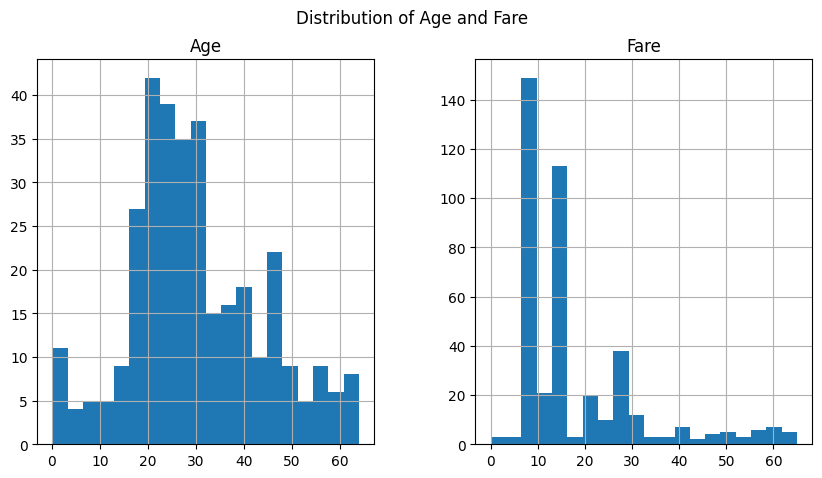

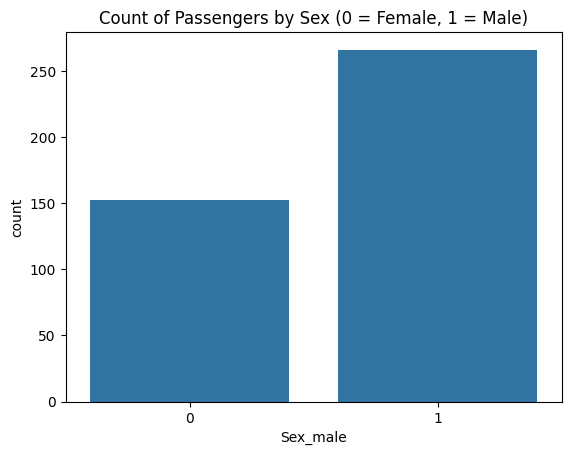

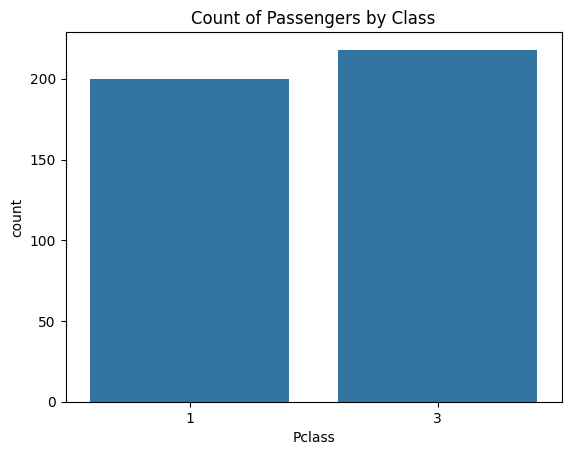

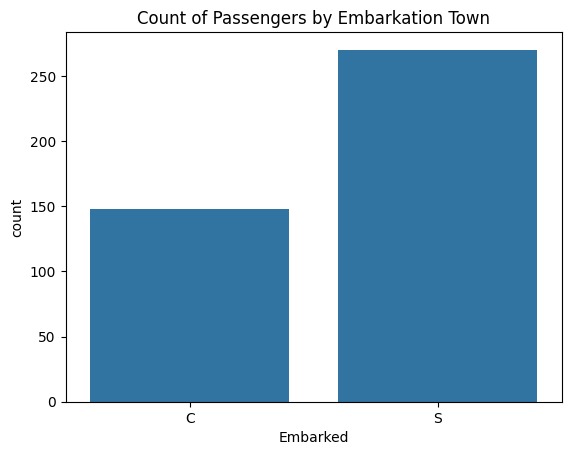

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograms for numerical features (Age, Fare)
df[['Age', 'Fare']].hist(bins=20, figsize=(10,5))
plt.suptitle('Distribution of Age and Fare')
plt.show()

# Bar plots for categorical features after one-hot encoding

# Sex distribution (using encoded column 'Sex_male')
if 'Sex_male' in df.columns:
    sns.countplot(x='Sex_male', data=df)
    plt.title('Count of Passengers by Sex (0 = Female, 1 = Male)')
    plt.show()

# Pclass distribution (using encoded columns e.g., 'Pclass_2', 'Pclass_3')
pclass_cols = [col for col in df.columns if 'Pclass_' in col]
if pclass_cols:
    df['Pclass'] = 1  # Default to first class
    for col in pclass_cols:
        df.loc[df[col]==1, 'Pclass'] = int(col.split('_')[1])
    sns.countplot(x='Pclass', data=df)
    plt.title('Count of Passengers by Class')
    plt.show()

# Embarked distribution (using encoded columns like 'Embarked_Q', 'Embarked_S')
embarked_cols = [col for col in df.columns if 'Embarked_' in col]
if embarked_cols:
    df['Embarked'] = 'C'  # Default to dropped category
    for col in embarked_cols:
        df.loc[df[col]==1, 'Embarked'] = col.split('_')[1]
    sns.countplot(x='Embarked', data=df)
    plt.title('Count of Passengers by Embarkation Town')
    plt.show()



In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Reload original dataset
df = pd.read_csv(r'/train.csv')

# Check column names
print(df.columns)




Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [ ]:
# One-hot encode categorical features, keep Survived as is
categorical_cols = ['Sex', 'Embarked', 'Pclass']  # Only these
for col in categorical_cols:
    df = pd.get_dummies(df, columns=[col], drop_first=True)


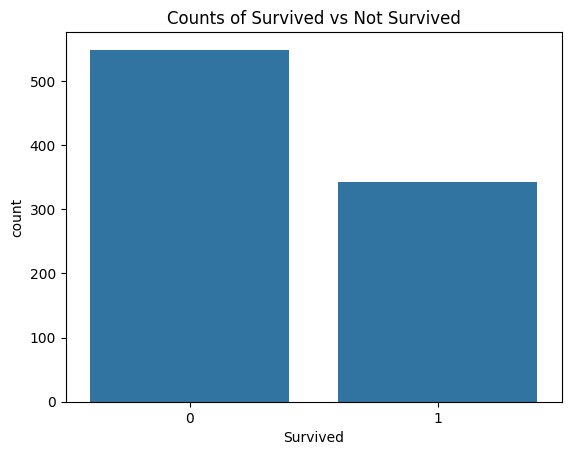

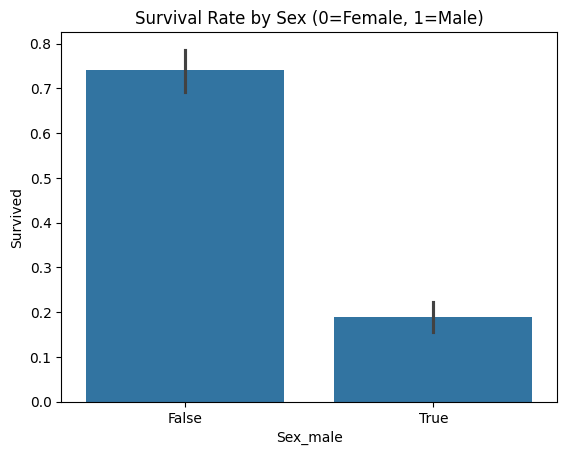

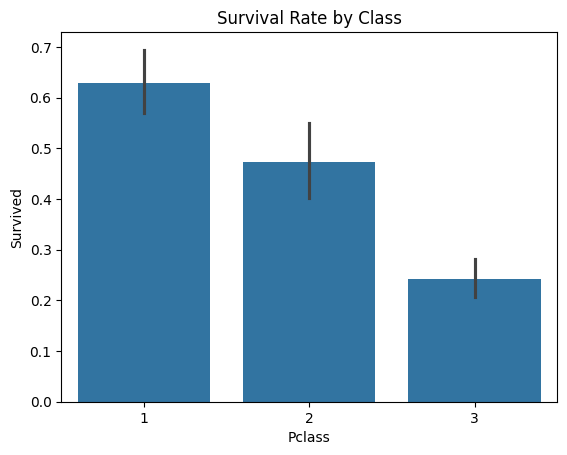

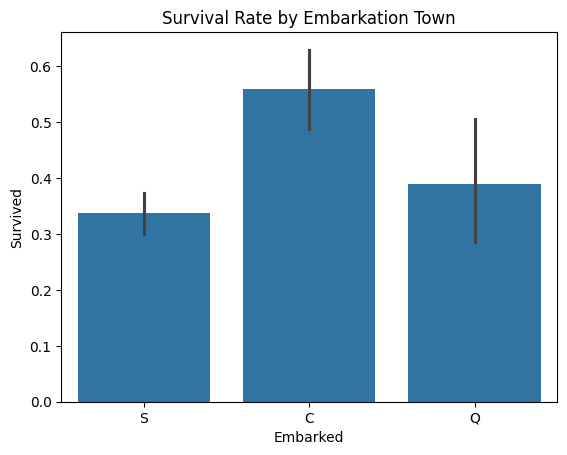

In [ ]:
# Count of survived vs not survived
sns.countplot(x='Survived', data=df)
plt.title('Counts of Survived vs Not Survived')
plt.show()

# Survival rate by Sex
sns.barplot(x='Sex_male', y='Survived', data=df)
plt.title('Survival Rate by Sex (0=Female, 1=Male)')
plt.show()

# Survival rate by Pclass
df['Pclass'] = 1  # Default first class
pclass_cols = [col for col in df.columns if 'Pclass_' in col]
for col in pclass_cols:
    df.loc[df[col]==1, 'Pclass'] = int(col.split('_')[1])

sns.barplot(x='Pclass', y='Survived', data=df)
plt.title('Survival Rate by Class')
plt.show()

# Survival rate by Embarked
df['Embarked'] = 'C'  # Default to dropped category
embarked_cols = [col for col in df.columns if 'Embarked_' in col]
for col in embarked_cols:
    df.loc[df[col]==1, 'Embarked'] = col.split('_')[1]

sns.barplot(x='Embarked', y='Survived', data=df)
plt.title('Survival Rate by Embarkation Town')
plt.show()


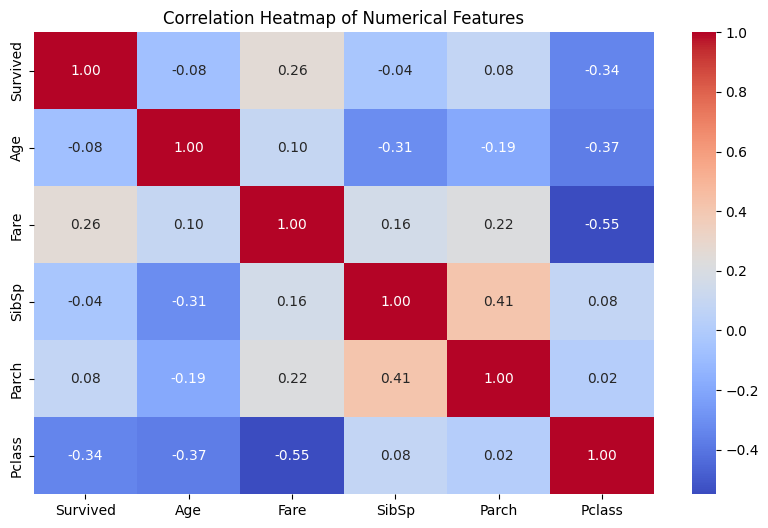

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select numerical columns only for correlation
numerical_cols = ['Survived', 'Age', 'Fare', 'SibSp', 'Parch', 'Pclass']  # Adjust based on your df

# Compute correlation matrix
corr_matrix = df[numerical_cols].corr()

# Plot heatmap
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Features')
plt.show()


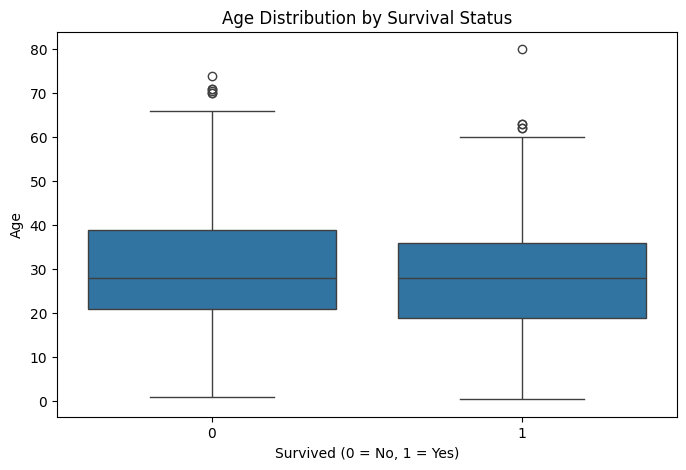

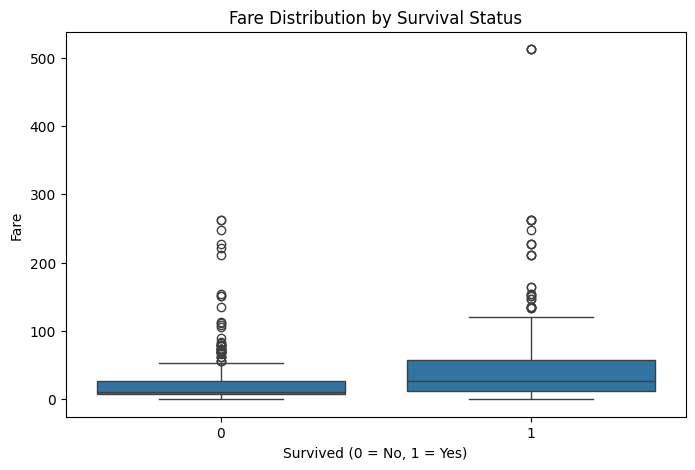

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot for Age grouped by Survived
plt.figure(figsize=(8,5))
sns.boxplot(x='Survived', y='Age', data=df)
plt.title('Age Distribution by Survival Status')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Age')
plt.show()

# Boxplot for Fare grouped by Survived
plt.figure(figsize=(8,5))
sns.boxplot(x='Survived', y='Fare', data=df)
plt.title('Fare Distribution by Survival Status')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Fare')
plt.show()


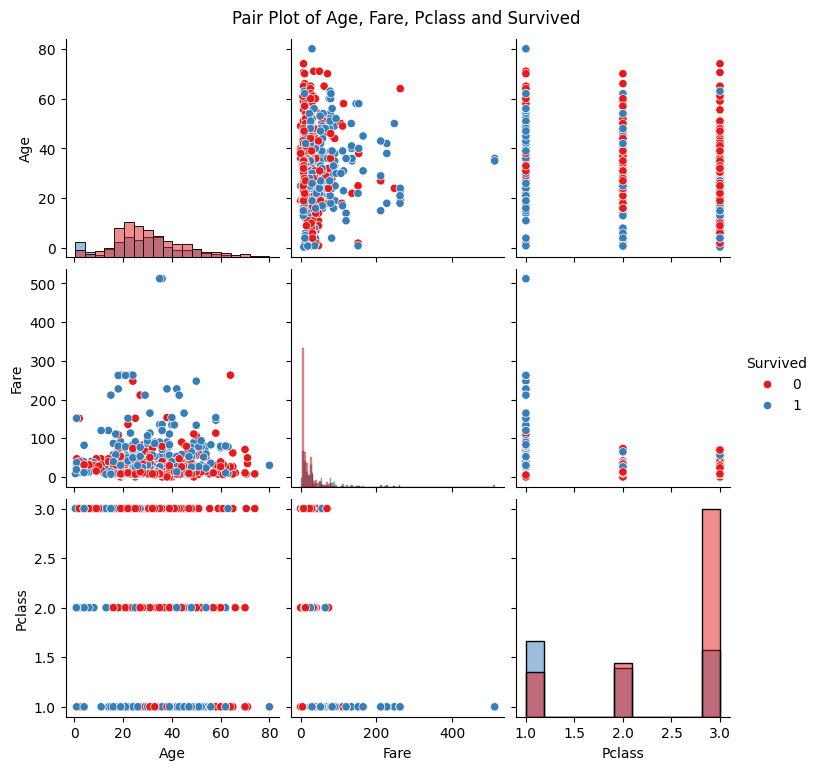

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure 'Pclass' exists (if you previously one-hot encoded, reconstruct it)
if 'Pclass' not in df.columns:
    pclass_cols = [col for col in df.columns if 'Pclass_' in col]
    if pclass_cols:
        df['Pclass'] = 1  # Default to first class
        for col in pclass_cols:
            df.loc[df[col]==1, 'Pclass'] = int(col.split('_')[1])

# Select features for pairplot
features = ['Age', 'Fare', 'Pclass', 'Survived']

# Create pairplot
sns.pairplot(df[features], hue='Survived', palette='Set1', diag_kind='hist')
plt.suptitle('Pair Plot of Age, Fare, Pclass and Survived', y=1.02)
plt.show()


In [ ]:
# Save the cleaned dataset to a CSV file
df.to_csv('titanic_cleaned.csv', index=False)

print("Cleaned dataset saved as 'titanic_cleaned.csv'")


Cleaned dataset saved as 'titanic_cleaned.csv'


In [ ]:
from google.colab import files
files.download('titanic_cleaned.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# CLEANED TITTANIC DATASET
df=pd.read_csv(r'/titanic_cleaned.csv');
# Display the first 5 rows
print(df.head())


   PassengerId  Survived                                               Name  \
0            1         0                            Braund, Mr. Owen Harris   
1            2         1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2            3         1                             Heikkinen, Miss. Laina   
3            4         1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
4            5         0                           Allen, Mr. William Henry   

    Age  SibSp  Parch            Ticket     Fare Cabin  Sex_male  Embarked_Q  \
0  22.0      1      0         A/5 21171   7.2500   NaN      True       False   
1  38.0      1      0          PC 17599  71.2833   C85     False       False   
2  26.0      0      0  STON/O2. 3101282   7.9250   NaN     False       False   
3  35.0      1      0            113803  53.1000  C123     False       False   
4  35.0      0      0            373450   8.0500   NaN      True       False   

   Embarked_S  Pclass_2  Pclass_3  Pclass Em